# Приоритизация и проверка гипотез

# Введение

**Название проекта:** анализ  и тестирование гипотез для увеличения выручки интернет-магазина

**Описание:** Проект состоит из двух частей:
* приоретизация гипотез, подготовленных совместно с отделом маркетинга, методами ICE и RICE;
* анализ результатов проведенного A/B теста.

**Цель:** выбрать гипотезу для тестирования и оценить проведенный тест.

**Задачи:** 
* **Часть 1**
0. Проверить иходные данные
1. Приоретизация гипотез по ICE
2. Приоретизация гипотез по RICE
3. Анализ результатов
* **Часть 2**
0. Проверить иходные данные
1. Построить и проанализировать графики кумулятивной выручки, среднего чека, относительного изменения кумулятивного среднего чека, ср. кол-ва заказов на посетителя, изм. ср. кол-ва заказов по группам и проанализировать их.
2. Построить точечный график кол-ва заказов по пользователям.
3. Посчитать перцентили  и построить графики по кол-ву заказов на пользователя и их стоимости. Выбрать границы для определения аномальных заказов.
4. Посчитать статистическую значимость различий в среднем чеке и кол-ве заказов на посетителя по сырым и очищенным данным. Проанализировать результаты.
5. Принять решение по результатам теста и дать рекомендацию бизнесу.

**Описание исходных данных:**
* Файл hypothesis.csv содержит описание гипотез и рассчитанные параметры Reach, Impact, Confidence и Efforts для оценки гипотез.
* Файл orders.csv содержит в себе информацию о заказах интернет-магазина: уникальный номер, номер пользователя, дату, выручку и группу A/B теста.
* Файл visitors.csv содержит в себе информацию о привлеченных пользователях интернет-магазина. В нем хранится дата привлечения, группа A/B теста и количество пользователей в этой группе в этот день.

# Часть 1. Приоритизация гипотез

В этой части я применяю методы ICE и RICE для того, чтобы узнать, какие гипотезы нужно проверять в первую очередь.

In [91]:
# подключаю библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# загружаю даннные по гипотезам
try:
    try:
        hypothesis = pd.read_csv('/Users/glebderabin/Мой диск/ЯПрактикум/Проект гипотезы/hypothesis.csv')
    except:
        hypothesis = pd.read_csv(r"C:\Users\Gleb\Мой диск\ЯПрактикум\Проект гипотезы\hypothesis.csv")
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')

# изучаю первые строки
display(hypothesis.head())

# проверяю nan
display(hypothesis.info())

# проверяю границы значений
display(hypothesis.describe())



,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Таблица содержит в себе описание и рассчитанные значения параметров для каждой из гипотез. Нет пропущенных значений, все величины распределены в пределах стандартной шкалы 0-10, переменные в прафильном формате. Можно рассчитывать ICE и RICE.

In [92]:
# рассчитываю ICE для каждой гипотезы и вывожу отсортированную таблицу

hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']
pd.set_option('display.max_colwidth', 0)
display(hypothesis.sort_values(by='ICE', ascending=False))


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Согласно методу ICE, наиболее приоритетными являются гипотезы:
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [93]:
# рассчитываю RICE для каждой гипотезы и вывожу отсортированную таблицу

hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

display(hypothesis.sort_values(by='RICE', ascending=False))


,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


Согласно методу RICE, наиболее приоритетными являются гипотезы:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

## Выводы по части 1

При использовании разных методов приоритизации гипотез изменились лидеры для проверки: по сравнению с ICE гипотеза 8 выбыла из лидеров, 7 поднялась вышел, 0 остался, 2 вошла в лидеры. Это произошла по причине того, что методика RICE учитывает параметр Reach - охват пользователей. Гипотеза 8 "Запустить акцию, дающую скидку на товар в день рождения" хороша с точки зрения уверенности в ней и влияния на пользователей, но охватывает очень малую долю пользователей и при этом требует среднее количество ресурсов, поэтому по методике RICE она спустилась с верхних мест. Гипотеза 7 заняла первое место, в этом ей помогло то, что ее реализация затронет абсолютно всех пользователей.

Я бы рекомендовал первым делом проверять гипотезу 7 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", так как она находится в лидерах по обоим методам, а по методу RICE в два раза отрывается от следующей за ней.

# Часть 2. Анализ A/B теста

В этой части проекта я по разным параметрам сравниваю между собой группы A и B, проверяю статистическую значимость различий по сырым и отфильтрованным данным, и в итоге принимаю решение по результатам теста.

## Подготовка

In [94]:
# загружаю даннные orders
try:
    try:
        orders = pd.read_csv('/Users/glebderabin/Мой диск/ЯПрактикум/Проект гипотезы/orders.csv')
    except:
        orders = pd.read_csv(r"C:\Users\Gleb\Мой диск\ЯПрактикум\Проект гипотезы\orders.csv")
except:
    orders = pd.read_csv('/datasets/orders.csv')

# загружаю даннные visitors
try:
    try:
        visitors = pd.read_csv('/Users/glebderabin/Мой диск/ЯПрактикум/Проект гипотезы/visitors.csv')
    except:
        visitors = pd.read_csv(r"C:\Users\Gleb\Мой диск\ЯПрактикум\Проект гипотезы\visitors.csv")
except:
    visitors = pd.read_csv('/datasets/visitors.csv')

# изучаю первые строки, проверяю nan, проверяю границы значений
for i in [orders, visitors]:
    print('*****************')
    display(i.head())
    display(i.info())
    display(i.describe())

*****************


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


*****************


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Проверяю дубликаты и пропуски

In [95]:
print('Количество полных дубликатов строк в таблице orders: ', orders.duplicated().sum()) 
print('Количество полных дубликатов строк в таблице visitors: ', visitors.duplicated().sum()) 

print('Количество пропусков в таблице orders: ', orders.isnull().sum().sum()) 
print('Количество пропусков в таблице visitors: ', visitors.isnull().sum().sum()) 


Количество полных дубликатов строк в таблице orders:  0
Количество полных дубликатов строк в таблице visitors:  0
Количество пропусков в таблице orders:  0
Количество пропусков в таблице visitors:  0


В таблицах нет пропусков и заметных аномальных значений. Нужно привести дату к правильному формату.

In [96]:
# привожу дату к правильному формату
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

**Выводы по предобработке**
Данные полные, без дубликатов строк и отсутствующих значений. На первый взгляд, нет аномальных значений. Дата приведена в правильный формат.

Чтобы построить графики, нужно собрать кумулятивные данные. Для этого создаю датафрейм cumulativeData со столбцами:
* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [97]:
# создаю массив уникальных пар дат и групп

dates_groups = orders[['date', 'group']].drop_duplicates()

# агрегирую кумулятивные данные о заказах по дням
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                .agg({'date': 'max', 'group': 'max', 'transactionId': 'nunique', 'visitorId': 'nunique', 'revenue': 'sum'}), axis=1
).sort_values(by=['date', 'group'])

# агрегирую кумулятивные данные о посетителях по дням
visitors_aggreagated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1
).sort_values(by=['date', 'group'])

# объединяю таблицы и даю названия колонкам
cumulative_data = orders_aggregated.merge(visitors_aggreagated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Теперь данные готовы к построению графиков. Приступим!

## График кумулятивной выручки по группам

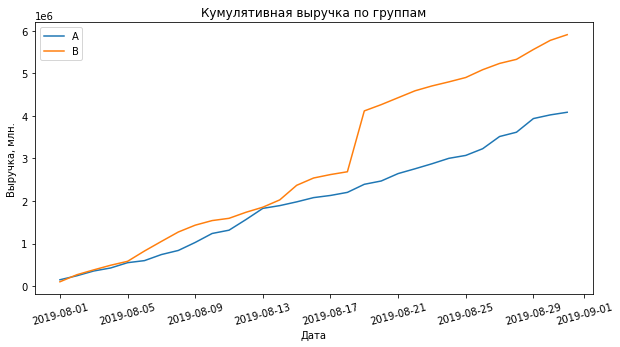

In [98]:
# датафрейм с кол-вом заказов и выручкой по дням для группы А
cumulative_revenue_A = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

# датафрейм с кол-вом заказов и выручкой по дням для группы B
cumulative_revenue_B = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

# строим график выручки
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xticks(rotation=15)
plt.xlabel('Дата')
plt.ylabel('Выручка, млн.')
plt.legend()

Для обеих групп выручка равномерно увеличивается. В группе B  наблюдается резкий скачок - он может быть связан с аномальным ростом количества заказов или их стоимости, который предстоит исключить. На первый взгляд, группа B  может показать себя лучше, чем A.

## График кумулятивного среднего чека по группам

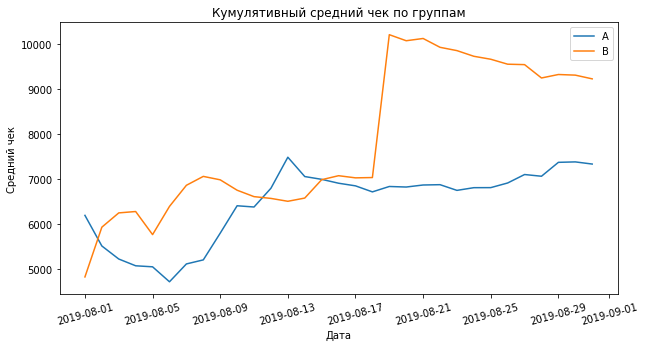

In [99]:
# строим график среднего чека
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'] / cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'] / cumulative_revenue_B['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xticks(rotation=15)
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()

В обоих группах средний чек становится равномерным ближе к концу теста. При этом для группы А немного растет, а для B снижается. В ту же дату, когда был обнаружен скачок выручки, наблюдается скачок среднего чека для группы B. Нужно исключить этот выброс или использовать больше данных, чтобы прийти к реальному среднему чеку.

## График относительного изменения кумулятивного среднего чека группы B к группе A

Text(0, 0.5, 'Отношение среднего чека B к A')

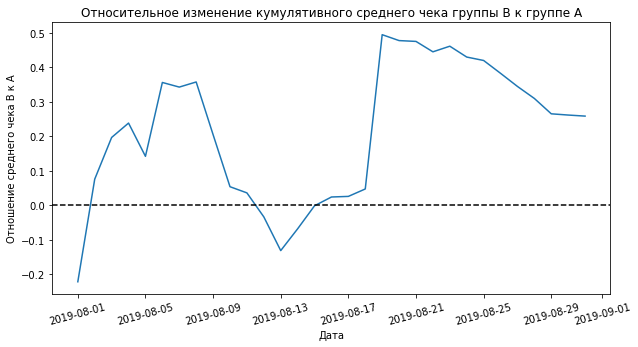

In [100]:
# объединяю данные в один фрейм
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строю график
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(merged_cumulative_revenue['date'], 
        (merged_cumulative_revenue['revenueB'] / merged_cumulative_revenue['ordersB']) / (merged_cumulative_revenue['revenueA'] / merged_cumulative_revenue['ordersA'])-1)
# добавляю ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=15)
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека B к A')

График значительно скачет в нескольких точках. Перед тем, как делать выводы, нужно удалить крупные заказы и выбросы.

## График кумулятивного среднего количества заказов на посетителя по группам

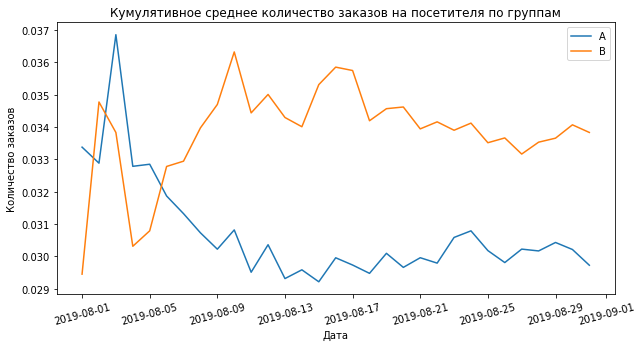

In [101]:
# считаю кумулятивное среднее количество заказов и разделяю данные по группам

cumulative_data['orders_per_visitor'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

# строю графики
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(cumulative_data_A['date'], cumulative_data_A['orders_per_visitor'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['orders_per_visitor'], label='B')
plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xticks(rotation=15)
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.legend()

Графики обладают некоей симметричностью вокруг среднего значения. В начале наблюдались резкие скачки, потом линии более-менее выровнялись вокруг своих значений. Среднее количество заказов на пользователя группы B значительно выше этого значения в группе A, судя по графику.

## График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Text(0, 0.5, 'Отношение среднего количества заказов \n на пользователя')

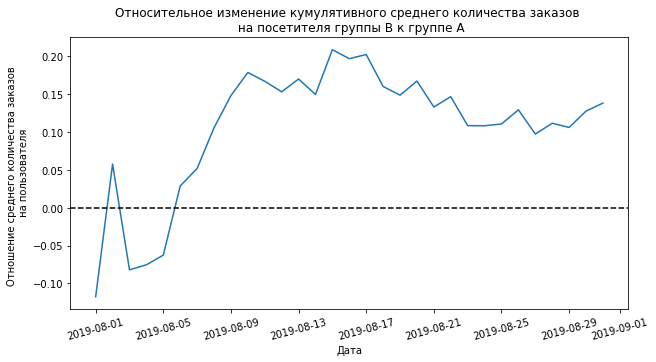

In [102]:
# объединяю данные
merged_cumulative_orders_per_visitor  = cumulative_data_A[['date', 'orders_per_visitor']].merge(cumulative_data_B[['date', 'orders_per_visitor']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# строю график
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(merged_cumulative_orders_per_visitor['date'], merged_cumulative_orders_per_visitor['orders_per_visitorB'] / merged_cumulative_orders_per_visitor['orders_per_visitorA'] - 1)
# добавляю ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего количества заказов \n на посетителя группы B к группе A')
plt.xticks(rotation=15)
plt.xlabel('Дата')
plt.ylabel('Отношение среднего количества заказов \n на пользователя')

В начале теста среднее количество заказов на пользователя группы B относительно группы A было ниже и наблюдались скачки. После среднее количество заказов на пользователя значительно выросло, скачки уменьшились, а значение со временем стало снижаться.

## Точечный график количества заказов по пользователям

Text(0, 0.5, 'Количество заказов')

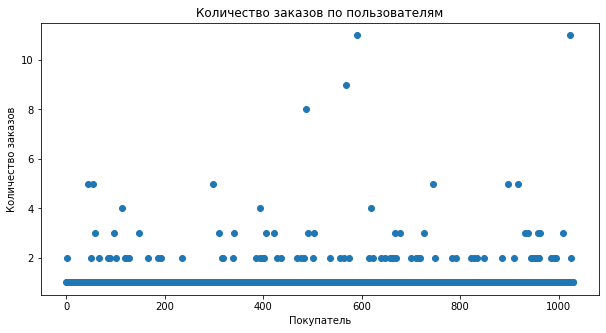

In [103]:
# группирую заказы по пользователям
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})
orders_by_users.columns = ['user_id', 'orders']

# строю график
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('Количество заказов по пользователям')
plt.xlabel('Покупатель')
plt.ylabel('Количество заказов')

Абсолютное большинство делают 1 заказ, но есть много пользователей с 2-3 заказами. Нужно узнать их долю, чтобы классифицировать как аномалию или нет.

## Считаю 95-й и 99-й перцентили количества заказов на пользователя

In [104]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


Только 5 процентов пользователей заказывают больше 2 заказов. Эту границу я выбираю для определения аномальных пользователей.

## Строю точечный график стоимостей заказов

Text(0, 0.5, 'Стоимость заказа, млн.')

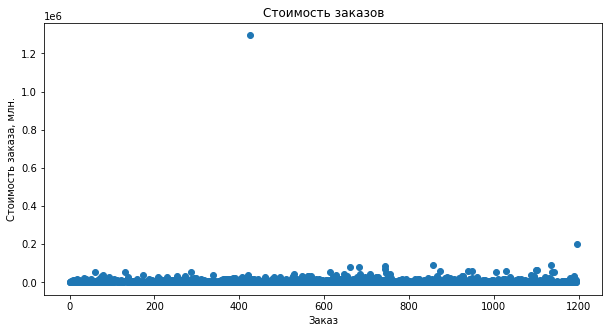

In [105]:
# строю график
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа, млн.')

Строю тот же график с отсечением слишком больших выбросов

(0.0, 120000.0)

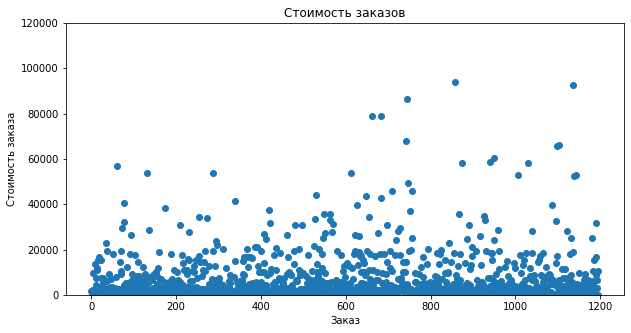

In [106]:
# строю график
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Заказ')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 120000)

Основная часть заказов имеет стоимость до 20 тысяч. Довольно много заказов имеют стоимость в диапазоне 20.000 - 80.000, существуют редкие аномалии дороже этой суммы. Нужно понять, по какой стоимости делать отсечку.

## Считаю 95-й и 99-й перцентили стоимости заказов

In [107]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


95 процентов заказов дешевле 28.000. Принимаю решение сделать отсечку по этому числу.

## Статистическая значимость различий в среднем количестве заказов на посетителя между группами между группами по «сырым» данным

Нулевая гипотеза: различий в среднем количестве заказов на пользователя между группами нет.
Альтернативная: различия есть. Уровень значимости - 0,05

In [108]:
#  подготовливаю фреймы с кол-вом заказов по пользователям
orders_by_users_A = (
    orders[orders['group'] == 'A']
        .groupby('visitorId', as_index=False)
        .agg({'transactionId': pd.Series.nunique})
)

orders_by_users_B = (
    orders[orders['group'] == 'B']
        .groupby('visitorId', as_index=False)
        .agg({'transactionId': pd.Series.nunique})
)

orders_by_users_A.columns = ['user_id', 'orders']
orders_by_users_B.columns = ['user_id', 'orders']

# Подготавливаю серии с нулями для тех, кто ничего не заказал
sample_A = pd.concat(
    [
    orders_by_users_A['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_A['orders'])), name='orders')
    ], axis=0)


sample_B = pd.concat(
    [
    orders_by_users_B['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_B['orders'])), name='orders')
    ], axis=0)

# применяю критерий и рассчитываю статистическую значимость, а также относительный прирост среднего числа заказов B / A
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B)[1]))
print("Отношение средних кол-ва заказов {0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))

p-value: 0.017
Отношение средних кол-ва заказов 0.138


Я получил p-value < 0.05, значит могу отвергнуть нулевую гипотезу о том, что статистически значимых различий нет. По сырым данным различия есть, среднее количество заказов у пользователей группы B выше на 13.8%.

## Считаю статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: статистически значимых различий в среднем чеке между группами нет.
Альтернативная гипотеза: статистически значимые различия в среднем чеке есть.
Уровень значимости 0.05

In [109]:
#  рассчитываю p-value
print("p-value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'])[1]))

# рассчитываю относительное различие в среднем чеке
print("относительное различие: {0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() -1))

p-value: 0.729
относительное различие: 0.259


p-value значительно больше 0,05, значит нулевая гипотеза верна и статистически значимых различий в среднем чеке нет. Однако средний чек группы B значительно выше среднего чека группы A - на 25.9%. Возможно, дело в аномальных значениях, от которых нужно избавиться.

## Удаляю аномалии из данных

За аномальных пользователей приняты пользователи, совершившие более 2-х заказов и / или заказ дороже 28.000.

In [110]:

abnormal_revenue = np.percentile(orders['revenue'], [95, 99])[0]
abnormal_orders = np.percentile(orders_by_users['orders'], [95, 99])[0]

users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] > abnormal_orders]['user_id'],
        orders_by_users_B[orders_by_users_B['orders'] > abnormal_orders]['user_id']
    ],
    axis=0
)

users_with_expensive_orders = orders[orders['revenue'] > abnormal_revenue]['visitorId']

abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis = 0)
    .drop_duplicates()
    .sort_values()
)

print(abnormal_users.head())
print('Всего аномальных пользователей: ', abnormal_users.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Всего аномальных пользователей:  74


По выбранным критериям обнаружены 74 аномальных пользователя. Это около 6 процентов от всех покупаетелей. Приемлемый уровень.

In [111]:
# формирую отфильтрованные наборы для теста
sample_A_filtered = pd.concat(
    [
    orders_by_users_A[np.logical_not(orders_by_users_A['user_id'].isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(orders_by_users_A['orders'])), name='orders')
    ], axis=0)

sample_B_filtered = pd.concat(
    [
    orders_by_users_B[np.logical_not(orders_by_users_B['user_id'].isin(abnormal_users))]['orders'],
    pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(orders_by_users_B['orders'])), name='orders')
    ], axis=0)

## Считаю статистическую значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным

Нулевая гипотеза: различий в среднем количестве заказов на пользователя между группами нет.
Альтернативная: различия есть. Уровень значимости - 0,05

In [112]:
# применяю критерий и рассчитываю статистическую значимость, а также относительный прирост среднего числа заказов B / A
print("p-value: {0:.3f}".format(stats.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1]))
print("Отношение средних кол-ва заказов {0:.3f}".format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

p-value: 0.013
Отношение средних кол-ва заказов 0.173


Критерий не превысил уровня значимости, значит нулевая гипотеза отвергается и статистически значимые различия есть. Относительное среднее кол-во заказов для группы B выше, и это статистически подтверждено. Результаты практически не отличаются от теста по сырым данным. Предполагаю, что группа B по показателю "среднее кол-во товаров на пользователя" действительно лучше группы A, то есть гипотеза подтвержается.

## Считаю статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: статистически значимых различий в среднем чеке между группами нет.
Альтернативная гипотеза: статистически значимые различия в среднем чеке есть.
Уровень значимости 0.05

In [113]:
#  рассчитываю p-value
print("p-value: {0:.3f}".format(
    stats.mannwhitneyu(
        orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'],
        orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'])[1]))

# рассчитываю относительное различие в среднем чеке
print("относительное различие: {0:.3f}".format(
    orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean()
    / orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abnormal_users)))]['revenue'].mean() -1))

p-value: 0.738
относительное различие: -0.020


P-value остался примерно на том же уровне и больше 0,05, значит нулевая гипотеза верна и статистически значимых различий в среднем чеке между группами A и B нет. После исключения аномалий относительное различие стало приблизительно равно 0, то есть различий нет и по этому фактору. Предполагаю, что внедрение изменений не повлияло на средний чек покупателей.

## Выводы по части 2

* Есть статистически значимое различие между группами A и B по среднему кол-ву заказов на посетителей, конверсия из посетителя в покупателя для группы B на 17% больше. Подтверждено на данных до и после фильтрации
* Нет статистически значимого различия между группами A и B по среднему чеку. p-value значительно выше критического уровня и на сырых, и на отфильтрованных данных. По отфильтрованным данным получена относительная разница среднего чека B к A -2%, то есть практически 0.
* График относительного изменения среднего количества заказов группы B к A демонстрирует устойчиво лучшие результаты группы B.

Исходя из описанных фактов рекомендую остановить A/B тест и признать его успешным. В результате тестирования гипотезы увеличилось среднее количество заказов на пользователя на 17%, а средний чек остался примерно тем же. Если цель гипотезы заключалась в этом, то она успешно прошла аппробацию и я рекомендую внедрить ее для всех пользователей.


# Общие выводы

В результате выполнения проекта:
* Проведена приоритизация предложенных отделом маркетинга гипотез. К первоочередному тестированию рекомендуется гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Она является оптимальной по соотношению трудозатрат к изменению воздействия, охвата и степени уверенности.
* Проведен анализ результатов A/B теста: он признан успешным состоявшимся, тестирование гипотезы по отфильтрованным от аномальных заказов и пользователях данных показало увеличение среднего количества заказов на пользователя на 17% при сохранении уровня среднего чека. Если это совпадает с ожидаемым результатом от внедрения гипотезы, то рекомендуется распространить нововведение на всех пользователей.